In [1]:
%pip install -qq -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [180]:
import pyrosm 
import folium
import branca
import numpy as np
import networkx as nx
import pandas as pd
import numpy as np
import urllib.request
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from folium.plugins import MarkerCluster
from shapely.geometry import Point, LineString
from datetime import datetime
from datasets_tourism import *
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
START_DATE = "2023-07-01"
END_DATE= "2023-10-30"

# Parcheggi

In [4]:
statistiche_parcheggi_molveno_df["date"] = pd.to_datetime(statistiche_parcheggi_molveno_df["date"])
statistiche_parcheggi_molveno_df

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
0,1.0,3.0,3.0,9.0,6.0,4.0,12.0,8.0,7.0,13.0,...,0.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,99.0,2022-07-27
1,1.0,4.0,5.0,4.0,10.0,14.0,35.0,23.0,22.0,21.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,156.0,2022-07-28
2,1.0,2.0,8.0,7.0,10.0,16.0,38.0,21.0,13.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,2022-07-29
3,5.0,15.0,21.0,23.0,35.0,22.0,107.0,83.0,85.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,604.0,2022-07-30
4,8.0,11.0,24.0,39.0,45.0,34.0,123.0,121.0,141.0,140.0,...,3.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,1056.0,2022-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,0.0,2.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2023-09-27
428,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2023-09-28
429,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0,5.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,2023-09-29
430,0.0,4.0,2.0,7.0,5.0,4.0,9.0,13.0,6.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2023-09-30


In [5]:
statistiche_parcheggi_molveno_df[statistiche_parcheggi_molveno_df.columns[:-1]] = statistiche_parcheggi_molveno_df[statistiche_parcheggi_molveno_df.columns[:-1]].astype(int)

In [6]:
parking_duration = list(statistiche_parcheggi_molveno_df.columns[:-10])
parking_duration.append("TOTALE")

## Capienza massima (2022-08-15)

In [102]:
statistiche_parcheggi_molveno_df[["date", "TOTALE"]].sort_values(by=["TOTALE"], ascending=False).head(20)

,date,TOTALE
19,2022-08-15,1257
20,2022-08-16,1244
354,2023-07-16,1169
18,2022-08-14,1152
389,2023-08-20,1142
388,2023-08-19,1114
383,2023-08-14,1112
21,2022-08-17,1074
4,2022-07-31,1056
382,2023-08-13,1050


In [103]:
statistiche_parcheggi_molveno_df[["TOTALE"]].max()

TOTALE    1257
dtype: int64

In [104]:
statistiche_parcheggi_molveno_df[statistiche_parcheggi_molveno_df["TOTALE"] == 1257]

,20 MIN,40 MIN,1 ORA,1 ORA E 20 MIN,1 ORA E 40 MIN,2 ORE,3 ORE,4 ORE,5 ORE,6 ORE,...,1 GIORNO,2 GIORNI,3 GIORNI,4 GIORNI,5 GIORNI,6 GIORNI,7 GIORNI,8 GIORNI,TOTALE,date
19,28,5,31,30,46,44,181,203,208,167,...,2,9,4,1,0,0,0,0,1257,2022-08-15


<Axes: xlabel='date'>

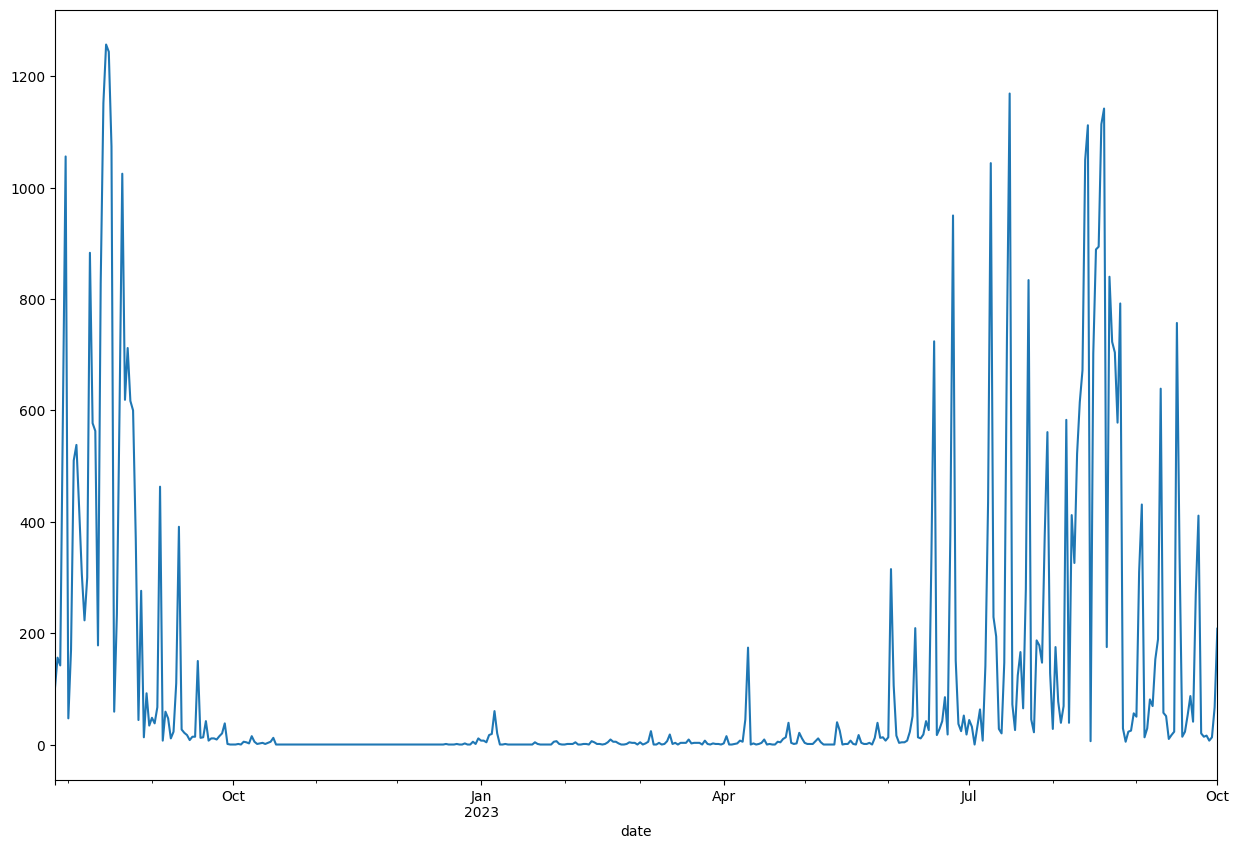

In [210]:
statistiche_parcheggi_molveno_df.groupby("date")["TOTALE"].max().plot(x="date", figsize=(15, 10))

In [219]:
statistiche_parcheggi_molveno_df.iloc[:, 1]

0       3
1       4
2       2
3      15
4      11
       ..
427     2
428     0
429     0
430     4
431     1
Name: 40 MIN, Length: 432, dtype: int64

Axes(0.125,0.747241;0.775x0.132759)
Axes(0.125,0.587931;0.775x0.132759)
Axes(0.125,0.428621;0.775x0.132759)
Axes(0.125,0.26931;0.775x0.132759)
Axes(0.125,0.11;0.775x0.132759)


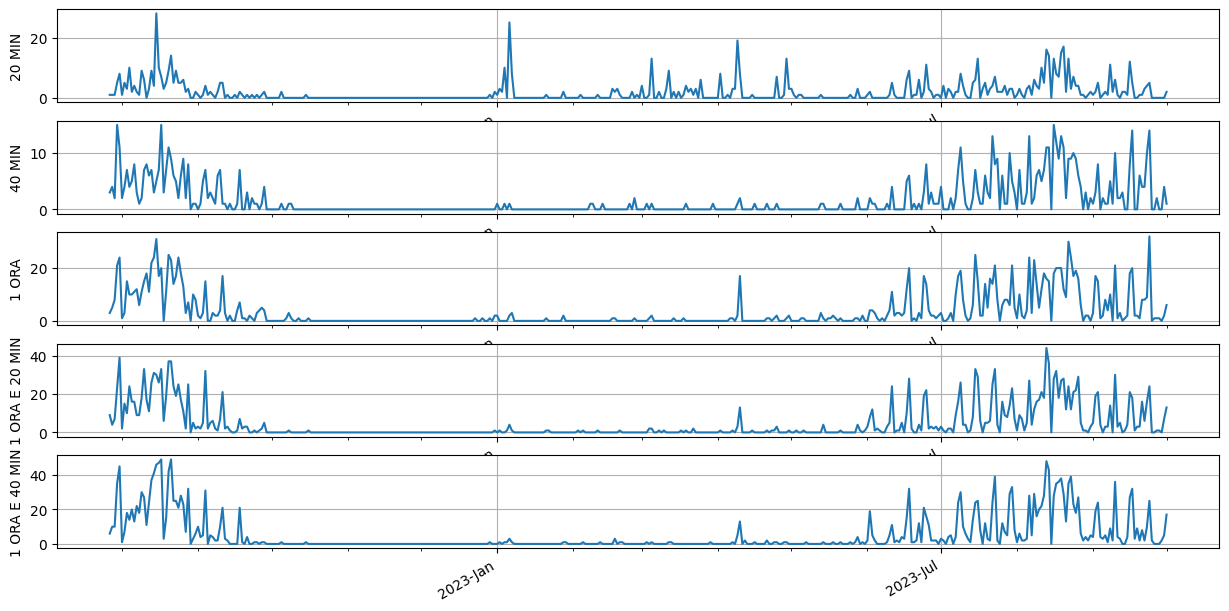

In [234]:
fig, axs = plt.subplots(5, 1, figsize=(15, 7))

index = 0
for ax in axs:
    print(ax)
    ax.plot(statistiche_parcheggi_molveno_df["date"], statistiche_parcheggi_molveno_df.iloc[:, index])
    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    ax.set_ylabel(statistiche_parcheggi_molveno_df.columns[index])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
    index = index + 1

plt.show()

# Traffico (Contamezzi)

## Spiaggia

In [11]:
contamezzi_df.rename(columns={"data": "date"}, inplace=True)
contamezzi_df["date"] = pd.to_datetime(contamezzi_df["date"])
contamezzi_df["day"] = pd.to_datetime(pd.to_datetime(contamezzi_df["date"]).dt.date)
contamezzi_df["hour"] = pd.to_datetime(contamezzi_df["date"]).dt.hour
contamezzi_df = contamezzi_df[
    (contamezzi_df["date"] >= START_DATE) &
    (contamezzi_df["date"] <= END_DATE)
]
contamezzi_df["total_cars"] = contamezzi_df[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].sum(axis=1)

In [12]:
entrata_lago = contamezzi_df[
    (contamezzi_df["sensore"] == "M47") & 
    (contamezzi_df["direzione"] == 1) & 
    (contamezzi_df["day"] >= START_DATE) & 
    (contamezzi_df["day"] <= END_DATE)]
entrata_lago = entrata_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])

uscita_lago = contamezzi_df[
    (contamezzi_df["sensore"] == "M47") & 
    (contamezzi_df["direzione"] == 2) & 
    (contamezzi_df["day"] >= START_DATE) & 
    (contamezzi_df["day"] <= END_DATE)]
uscita_lago = uscita_lago.reset_index().drop(columns=['index','sensore','direzione','comune'])

differenza_lago = entrata_lago.set_index(['date','day','hour']).subtract(uscita_lago.set_index(['date','day','hour']), fill_value=0).reset_index()

cumulativa_lago = differenza_lago.copy()
for c in ['cl1','cl2','cl3','cl4','cl5','cl6','cl7','nonrilevato','total_cars']: 
    cumulativa_lago[c] = cumulativa_lago[c].cumsum()
cumulativa_lago

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-07-01 00:00:00,2023-07-01,0,6,-1,0,0,0,0,0,0,5
1,2023-07-01 01:00:00,2023-07-01,1,7,-1,0,0,0,0,0,0,6
2,2023-07-01 02:00:00,2023-07-01,2,7,-1,0,0,0,0,0,0,6
3,2023-07-01 03:00:00,2023-07-01,3,7,0,0,0,0,0,0,0,7
4,2023-07-01 04:00:00,2023-07-01,4,9,1,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...
2299,2023-10-04 19:00:00,2023-10-04,19,15668,2045,-41,937,1349,-55,-47,-3323,16533
2300,2023-10-04 20:00:00,2023-10-04,20,15660,2044,-40,937,1349,-55,-47,-3322,16526
2301,2023-10-04 21:00:00,2023-10-04,21,15660,2044,-40,937,1349,-55,-47,-3322,16526
2302,2023-10-04 22:00:00,2023-10-04,22,15658,2046,-40,937,1349,-55,-47,-3322,16526


### Cumulativa max

In [13]:
cumulativa_lago.max()

date           2023-10-04 23:00:00
day            2023-10-04 00:00:00
hour                            23
cl1                          16065
cl2                           2112
cl3                            429
cl4                            937
cl5                           1349
cl6                             12
cl7                              1
nonrilevato                      0
total_cars                   16925
dtype: object

In [14]:
cumulativa_lago.describe()

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
count,2304,2304,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,2023-08-17 23:30:00,2023-08-17 12:00:00,11.500000,8390.574219,1269.368924,69.915365,614.172743,728.144097,-20.992622,-21.541667,-1783.486979,9246.154080
min,2023-07-01 00:00:00,2023-07-01 00:00:00,0.000000,6.000000,-1.000000,-88.000000,0.000000,0.000000,-55.000000,-47.000000,-3323.000000,5.000000
25%,2023-07-24 23:45:00,2023-07-24 18:00:00,5.750000,2949.000000,1003.000000,-21.000000,430.000000,366.000000,-44.000000,-40.000000,-2915.000000,4149.000000
50%,2023-08-17 23:30:00,2023-08-17 12:00:00,11.500000,8494.000000,1370.000000,32.000000,666.000000,765.000000,-17.500000,-17.000000,-1613.000000,9865.500000
75%,2023-09-10 23:15:00,2023-09-10 06:00:00,17.250000,14297.000000,1647.000000,159.000000,848.000000,1119.000000,0.000000,-9.000000,-892.000000,14854.250000
max,2023-10-04 23:00:00,2023-10-04 00:00:00,23.000000,16065.000000,2112.000000,429.000000,937.000000,1349.000000,12.000000,1.000000,0.000000,16925.000000
std,NaN,NaN,6.923689,5562.825178,511.659083,121.562094,261.438775,408.528588,23.088390,14.828239,1083.175691,5473.368291


In [15]:
cumulativa_lago.sort_values(by=["total_cars"], ascending=False).head(10)

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
2222,2023-10-01 14:00:00,2023-10-01,14,16065,2112,-78,925,1292,-52,-45,-3294,16925
2221,2023-10-01 13:00:00,2023-10-01,13,16033,2108,-79,924,1293,-52,-45,-3292,16890
2220,2023-10-01 12:00:00,2023-10-01,12,16034,2104,-81,924,1292,-52,-44,-3289,16888
2223,2023-10-01 15:00:00,2023-10-01,15,16018,2104,-75,925,1293,-51,-45,-3297,16872
2219,2023-10-01 11:00:00,2023-10-01,11,15908,2105,-83,924,1292,-52,-44,-3289,16761
2224,2023-10-01 16:00:00,2023-10-01,16,15889,2085,-76,924,1296,-51,-45,-3304,16718
2198,2023-09-30 14:00:00,2023-09-30,14,15770,2085,-88,928,1288,-51,-45,-3246,16641
2197,2023-09-30 13:00:00,2023-09-30,13,15762,2085,-88,929,1288,-51,-45,-3242,16638
2199,2023-09-30 15:00:00,2023-09-30,15,15760,2083,-86,927,1289,-51,-45,-3253,16624
2200,2023-09-30 16:00:00,2023-09-30,16,15738,2093,-81,929,1289,-51,-45,-3258,16614


### Differenza max

In [16]:
differenza_lago.max()

date           2023-10-04 23:00:00
day            2023-10-04 00:00:00
hour                            23
cl1                            304
cl2                             41
cl3                             16
cl4                             11
cl5                              9
cl6                              4
cl7                              3
nonrilevato                    119
total_cars                     376
dtype: object

In [17]:
differenza_lago.describe()

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
count,2304,2304,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,2023-08-17 23:30:00,2023-08-17 12:00:00,11.500000,6.796875,0.888455,-0.017361,0.406684,0.585503,-0.023872,-0.020399,-1.441840,7.174045
min,2023-07-01 00:00:00,2023-07-01 00:00:00,0.000000,-295.000000,-102.000000,-62.000000,-56.000000,-24.000000,-15.000000,-5.000000,-101.000000,-481.000000
25%,2023-07-24 23:45:00,2023-07-24 18:00:00,5.750000,-8.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-8.000000
50%,2023-08-17 23:30:00,2023-08-17 12:00:00,11.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2023-09-10 23:15:00,2023-09-10 06:00:00,17.250000,12.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,15.000000
max,2023-10-04 23:00:00,2023-10-04 00:00:00,23.000000,304.000000,41.000000,16.000000,11.000000,9.000000,4.000000,3.000000,119.000000,376.000000
std,NaN,NaN,6.923689,55.357720,8.819075,4.799647,3.051301,1.907222,0.758134,0.486037,10.045148,70.690599


In [18]:
differenza_lago.sort_values(by=["total_cars"], ascending=False).head(10)

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
1857,2023-09-16 09:00:00,2023-09-16,9,238,28,2,6,3,0,1,98,376
202,2023-07-09 10:00:00,2023-07-09,10,304,24,4,1,7,0,0,13,353
370,2023-07-16 10:00:00,2023-07-16,10,300,20,7,3,2,-1,0,13,344
203,2023-07-09 11:00:00,2023-07-09,11,301,18,2,0,1,0,0,19,341
1258,2023-08-22 10:00:00,2023-08-22,10,222,41,15,6,5,1,0,44,334
371,2023-07-16 11:00:00,2023-07-16,11,233,32,4,-1,3,0,1,53,325
1282,2023-08-23 10:00:00,2023-08-23,10,253,39,3,2,3,-1,1,12,312
1042,2023-08-13 10:00:00,2023-08-13,10,211,22,13,0,3,0,3,59,311
1210,2023-08-20 10:00:00,2023-08-20,10,288,17,7,0,1,1,-1,-2,311
1066,2023-08-14 10:00:00,2023-08-14,10,214,25,5,4,7,4,0,48,307


## Gestione Strade

In [19]:
contamezzi_df = mlrun.get_dataitem("s3://datalake/projects/overtourism/artifacts/contamezzi.parquet.parquet").as_df()
contamezzi_df.rename(columns={"data": "date"}, inplace=True)
contamezzi_df["date"] = pd.to_datetime(contamezzi_df["date"])
contamezzi_df["day"] = pd.to_datetime(pd.to_datetime(contamezzi_df["date"]).dt.date)
contamezzi_df["hour"] = pd.to_datetime(contamezzi_df["date"]).dt.hour
contamezzi_df["total_cars"] = contamezzi_df[["cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "nonrilevato"]].sum(axis=1)

entrata_paese_1 = contamezzi_df[(contamezzi_df["sensore"] == "M40") & (contamezzi_df["direzione"] == 1) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
entrata_paese_1 = entrata_paese_1.reset_index().drop(columns=['index','sensore','direzione','comune'])

uscita_paese_1 = contamezzi_df[(contamezzi_df["sensore"] == "M40") & (contamezzi_df["direzione"] == 2) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
uscita_paese_1 = uscita_paese_1.reset_index().drop(columns=['index','sensore','direzione','comune'])

entrata_paese_2 = contamezzi_df[(contamezzi_df["sensore"] == "M42") & (contamezzi_df["direzione"] == 1) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
entrata_paese_2 = entrata_paese_2.reset_index().drop(columns=['index','sensore','direzione','comune'])

uscita_paese_2 = contamezzi_df[(contamezzi_df["sensore"] == "M42") & (contamezzi_df["direzione"] == 2) & (contamezzi_df["day"] >= START_DATE) & (contamezzi_df["day"] <= END_DATE)]
uscita_paese_2 = uscita_paese_2.reset_index().drop(columns=['index','sensore','direzione','comune'])

entrata_paese = entrata_paese_1.set_index(['date','day','hour']).add(entrata_paese_2.set_index(['date','day','hour']), fill_value=0).reset_index()
uscita_paese = uscita_paese_1.set_index(['date','day','hour']).add(uscita_paese_2.set_index(['date','day','hour']), fill_value=0).reset_index()

differenza_paese = entrata_paese.set_index(['date','day','hour']).subtract(uscita_paese.set_index(['date','day','hour']), fill_value=0).reset_index()

cumulativa_paese = differenza_paese.copy()
for c in ['cl1','cl2','cl3','cl4','cl5','cl6','cl7','nonrilevato','total_cars']: 
    cumulativa_paese[c] = cumulativa_paese[c].cumsum()
cumulativa_paese

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
0,2023-07-01 00:00:00,2023-07-01,0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
1,2023-07-01 01:00:00,2023-07-01,1,10.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,16.0
2,2023-07-01 02:00:00,2023-07-01,2,14.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,19.0
3,2023-07-01 03:00:00,2023-07-01,3,13.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,19.0
4,2023-07-01 04:00:00,2023-07-01,4,9.0,5.0,2.0,2.0,0.0,0.0,0.0,1.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2299,2023-10-04 19:00:00,2023-10-04,19,-8233.0,23078.0,8947.0,4574.0,1068.0,335.0,-158.0,4570.0,34181.0
2300,2023-10-04 20:00:00,2023-10-04,20,-8228.0,23078.0,8947.0,4574.0,1068.0,335.0,-158.0,4571.0,34187.0
2301,2023-10-04 21:00:00,2023-10-04,21,-8227.0,23077.0,8947.0,4574.0,1068.0,335.0,-158.0,4572.0,34188.0
2302,2023-10-04 22:00:00,2023-10-04,22,-8227.0,23076.0,8947.0,4574.0,1068.0,335.0,-158.0,4572.0,34187.0


In [106]:
cumulativa_paese.describe()

,date,day,hour,cl1,cl2,cl3,cl4,cl5,cl6,cl7,nonrilevato,total_cars
count,2304,2304,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,2023-08-17 23:30:00,2023-08-17 12:00:00,11.500000,-4663.286024,12718.766493,4814.000868,2575.149306,514.875434,189.860243,-67.574219,2302.851997,18384.644097
min,2023-07-01 00:00:00,2023-07-01 00:00:00,0.000000,-8248.000000,1.000000,0.000000,1.000000,-4.000000,0.000000,-158.000000,-4.000000,-164.000000
25%,2023-07-24 23:45:00,2023-07-24 18:00:00,5.750000,-6662.000000,6213.000000,2246.000000,1270.750000,258.750000,89.000000,-105.000000,1125.750000,8844.500000
50%,2023-08-17 23:30:00,2023-08-17 12:00:00,11.500000,-5522.500000,12891.000000,5008.000000,2673.000000,513.000000,199.500000,-63.000000,2335.000000,17820.500000
75%,2023-09-10 23:15:00,2023-09-10 06:00:00,17.250000,-2363.250000,19964.500000,7439.000000,4010.000000,768.250000,299.250000,-25.000000,3514.000000,29730.000000
max,2023-10-04 23:00:00,2023-10-04 00:00:00,23.000000,150.000000,23079.000000,8947.000000,4574.000000,1068.000000,341.000000,5.000000,4572.000000,34312.000000
std,NaN,NaN,6.923689,2461.786506,7387.678159,2806.141888,1461.839707,325.315816,109.330968,48.454711,1358.399219,10999.105314


In [114]:
cumulativa_paese[["date","total_cars"]].max()

date          2023-10-04 23:00:00
total_cars                34312.0
dtype: object

# Dati Vodafone

In [20]:
vodafone_attendences_df["date"] = pd.to_datetime(vodafone_attendences_df["date"])

LOC_ID_LAGO_MOLVENO = "LAGO_MOLV"
LOC_ID_MOLVENO = "27"
LOC_ID_APT_MOLVENO = "105"

presenze_vodafone = vodafone_attendences_df[
    (vodafone_attendences_df["date"] >= START_DATE) &
    (vodafone_attendences_df["date"] <= END_DATE) &
    (vodafone_attendences_df["value"] != 0) &
    #(vodafone_attendences_df["userProfile"] == "TOURIST") &
    (vodafone_attendences_df["locId"] == LOC_ID_APT_MOLVENO)
]
presenze_vodafone

,date,locType,locId,userCountry,userProfile,userCluster,value
2980720,2023-07-01,TN_MKT_AM_22,105,ALB,TOURIST,None,137
2980726,2023-07-01,TN_MKT_AM_22,105,AUT,TOURIST,A,180
2980727,2023-07-01,TN_MKT_AM_22,105,AUT,VISITOR,A,119
2980728,2023-07-01,TN_MKT_AM_22,105,BEL,TOURIST,B,43
2980739,2023-07-01,TN_MKT_AM_22,105,CHE,TOURIST,CH,43
...,...,...,...,...,...,...,...
3783711,2023-10-30,TN_MKT_AM_22,105,ROU,VISITOR,UE,72
3783714,2023-10-30,TN_MKT_AM_22,105,SRB,TOURIST,UE,18
3783718,2023-10-30,TN_MKT_AM_22,105,SVN,TOURIST,UE,40
3783720,2023-10-30,TN_MKT_AM_22,105,SWE,TOURIST,UE,58


In [23]:
presenze_vodafone_visitors = presenze_vodafone[(presenze_vodafone["userProfile"] == "VISITOR")]
presenze_vodafone_visitors

,date,locType,locId,userCountry,userProfile,userCluster,value
2980727,2023-07-01,TN_MKT_AM_22,105,AUT,VISITOR,A,119
2980747,2023-07-01,TN_MKT_AM_22,105,CZE,VISITOR,CZ,260
2980750,2023-07-01,TN_MKT_AM_22,105,DEU,VISITOR,DE,432
2980752,2023-07-01,TN_MKT_AM_22,105,DNK,VISITOR,UE,133
2980757,2023-07-01,TN_MKT_AM_22,105,ESP,VISITOR,UE,22
...,...,...,...,...,...,...,...
3783663,2023-10-30,TN_MKT_AM_22,105,GBR,VISITOR,UK,32
3783678,2023-10-30,TN_MKT_AM_22,105,ITA,VISITOR,IT,7902
3783682,2023-10-30,TN_MKT_AM_22,105,LTU,VISITOR,UE,51
3783704,2023-10-30,TN_MKT_AM_22,105,POL,VISITOR,PL,90


In [26]:
presenze_vodafone_visitors[presenze_vodafone_visitors["date"] == "2023-07-01"]

,date,locType,locId,userCountry,userProfile,userCluster,value
2980727,2023-07-01,TN_MKT_AM_22,105,AUT,VISITOR,A,119
2980747,2023-07-01,TN_MKT_AM_22,105,CZE,VISITOR,CZ,260
2980750,2023-07-01,TN_MKT_AM_22,105,DEU,VISITOR,DE,432
2980752,2023-07-01,TN_MKT_AM_22,105,DNK,VISITOR,UE,133
2980757,2023-07-01,TN_MKT_AM_22,105,ESP,VISITOR,UE,22
2980764,2023-07-01,TN_MKT_AM_22,105,FRA,VISITOR,UE,47
2980766,2023-07-01,TN_MKT_AM_22,105,GBR,VISITOR,UK,44
2980770,2023-07-01,TN_MKT_AM_22,105,GRC,VISITOR,UE,18
2980774,2023-07-01,TN_MKT_AM_22,105,HUN,VISITOR,UE,22
2980781,2023-07-01,TN_MKT_AM_22,105,ISR,VISITOR,None,18


In [33]:
presenze_vodafone_visitors.groupby("date")[["value"]].sum().head(10).sort_values(by="value", ascending=False)

,value
date,
2023-07-08,12644
2023-07-07,12350
2023-07-10,11679
2023-07-09,11180
2023-07-06,11106
2023-07-04,10934
2023-07-01,10243
2023-07-05,10084
2023-07-03,9904


<Axes: xlabel='date'>

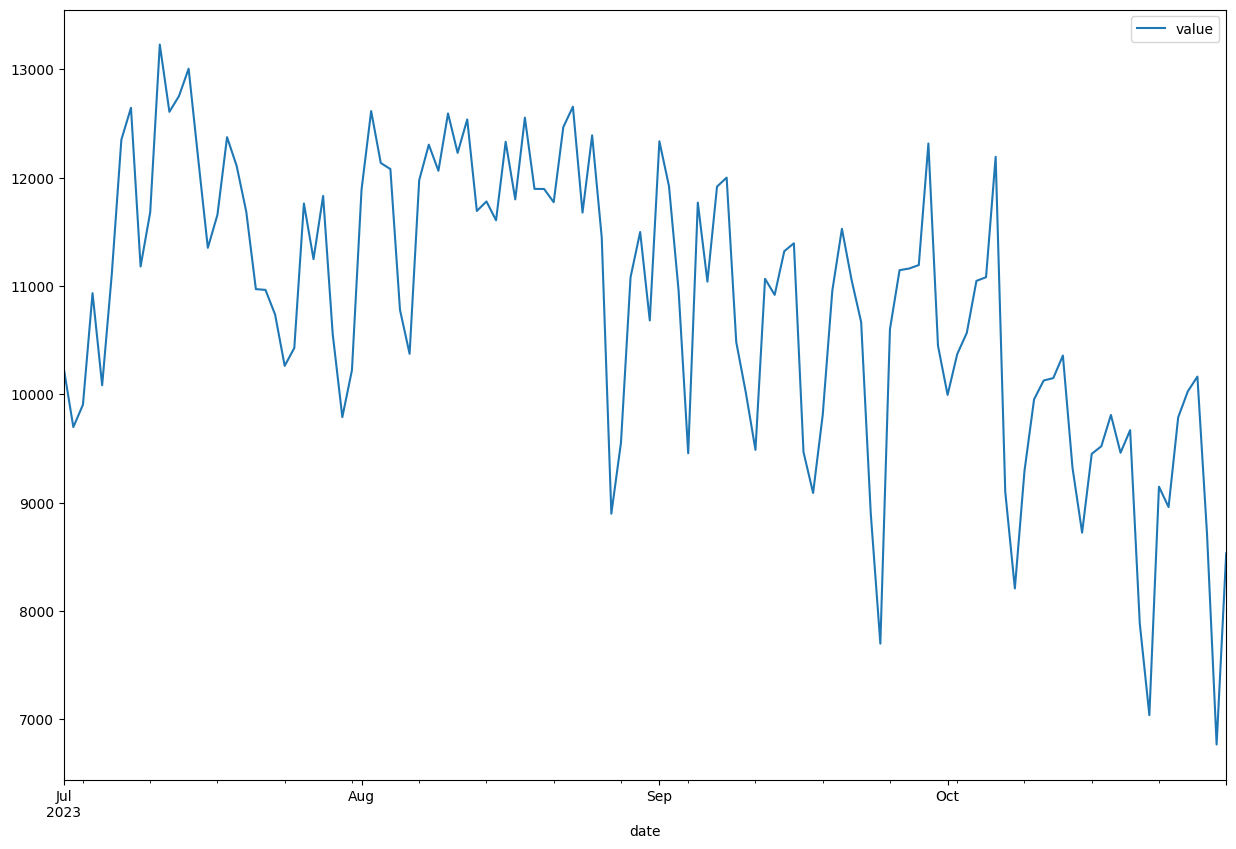

In [35]:
presenze_vodafone_visitors.groupby("date")[["value"]].sum().plot(figsize=(15, 10))

## The dates with the highest number of visitors

<Axes: xlabel='date'>

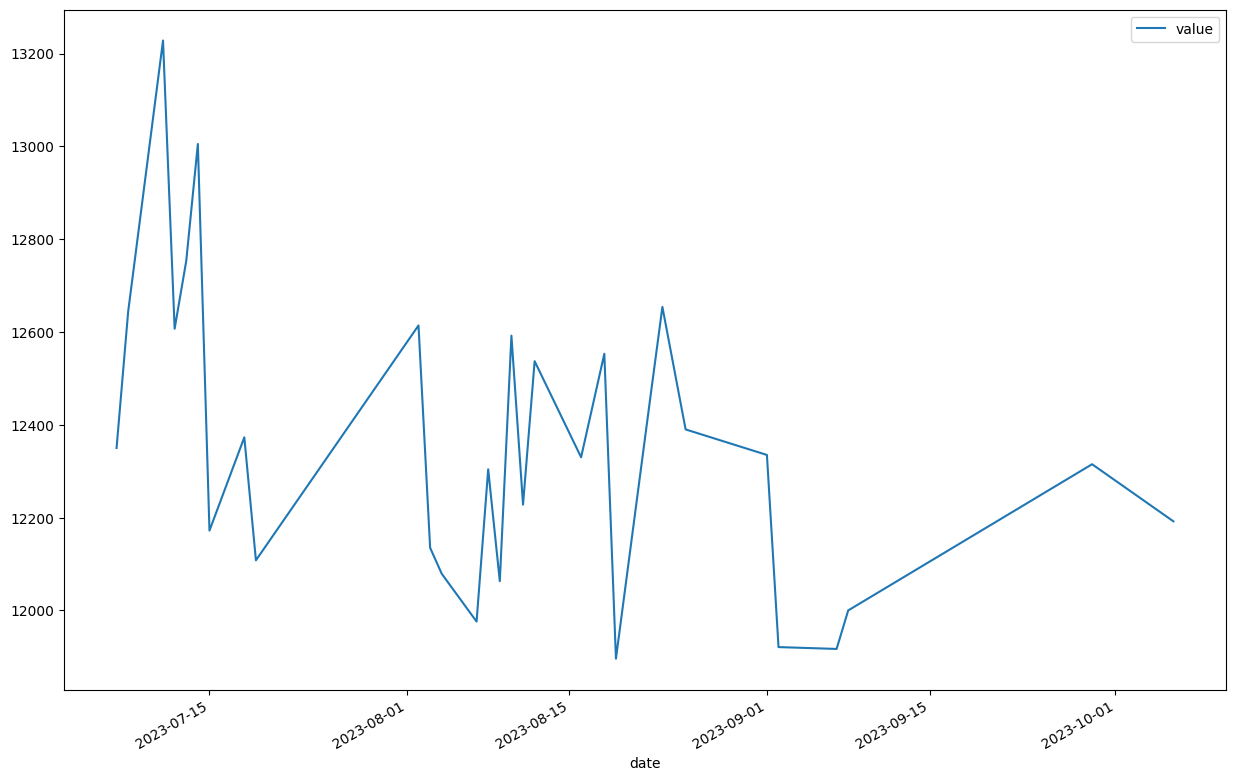

In [95]:
max_visitors = presenze_vodafone_visitors.groupby("date")[["value"]].sum().sort_values(by="value", ascending=False).head(30)
max_visitors.plot(figsize=(15, 10))

# Dati Meteo

## Pioggia

<Axes: xlabel='date'>

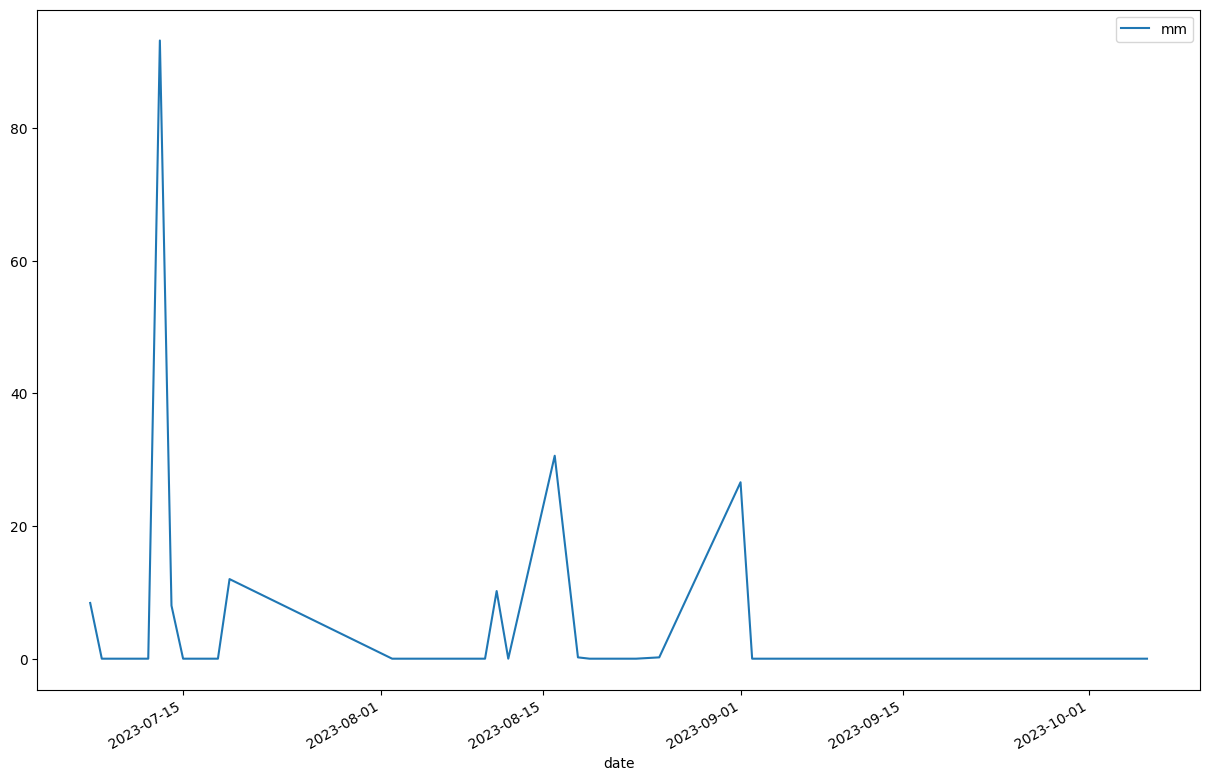

In [48]:
pioggia_for_max_visitors = dati_pioggia_df[dati_pioggia_df["date"].isin(max_visitors.reset_index()["date"])]
pioggia_for_max_visitors.plot(x="date", figsize=(15, 10))

In [66]:
max_visitors.reset_index().sort_values(by="date")["value"]

13    12350
4     12644
0     13228
6     12607
2     12753
1     13005
20    12172
12    12373
22    12108
5     12614
21    12135
23    12079
26    11976
17    12304
24    12063
7     12592
18    12228
9     12537
15    12330
8     12553
29    11896
10    12466
3     12654
11    12390
14    12335
27    11921
28    11917
25    12000
16    12315
19    12192
Name: value, dtype: int64

In [67]:
pioggia_for_max_visitors.reset_index().sort_values(by="date")["mm"]

6      8.4
14     0.0
26     0.0
28     0.0
9     93.2
10     8.0
11     0.0
12     0.0
13    12.0
1      0.0
3      0.0
4      0.0
7      0.0
15     0.0
23     0.0
25     0.0
27    10.2
29     0.0
17    30.6
18     0.2
19     0.0
20     0.0
21     0.0
22     0.2
0     26.6
2      0.0
8      0.0
16     0.0
24     0.0
5      0.0
Name: mm, dtype: float64

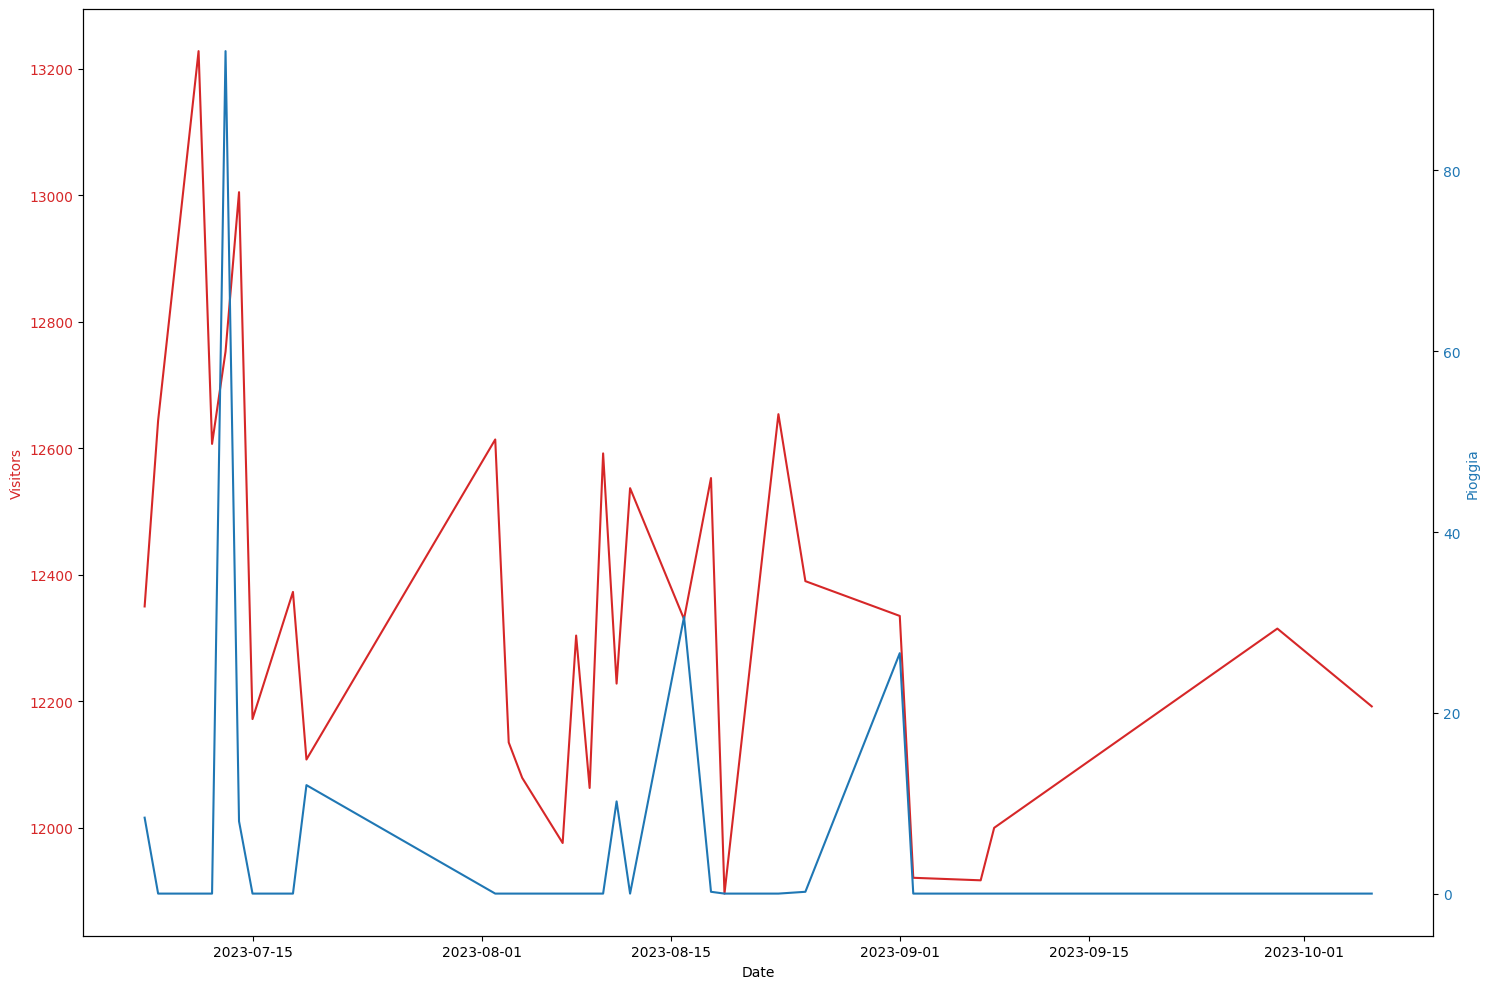

In [101]:
max_visitors_plot = max_visitors.reset_index().sort_values(by="date")
time_frame = max_visitors_plot["date"]
visitors = max_visitors_plot["value"]

fig, ax1 = plt.subplots(figsize=(15, 10))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Visitors', color=color)
ax1.plot(time_frame, visitors, color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Pioggia', color=color) 
ax2.plot(time_frame, pioggia_for_max_visitors.reset_index().sort_values(by="date")["mm"], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.show()

# Eventi

In [164]:
manifestazioni_df

,nr,richiedente,manifestazione,luogo,data_manifestazione_inizio,data_manifestazione_fine,partecipanti_dichiarati,spesa,spesa_ritenuta_ammissibile,doc_tm_sra_200000,punti,percentuale_intervento,contributo,typology
0,7,Apaloosa Advertising s.r.l.,Week 4 Kids,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,2023-03-12 00:00:00,2023-03-18 00:00:00,5000,80000,80000,non serve,52.0,0.1,8000,2023_first_part
1,16,Centro Sportivo Italiano Presidenza Nazionale,XXIV Campionato Nazionale CSI di Sci,Andalo,2023-03-16 00:00:00,2023-03-19 00:00:00,750,70000,70000,non serve,67.0,0.15,10500,2023_first_part
2,37,Royal Academy of Dance srl,Scuola Estiva Internazionale Royal Academy of ...,Altopiano Paganella,2023-06-26 00:00:00,2023-07-08 00:00:00,1500,184000,184000,non serve,60.0,0.1,18400,2023_first_part
3,61,A.S.D. PowerStage,2° Dolomiti Brenta Rally,Andalo,2023-04-21 00:00:00,2023-04-22 00:00:00,3000,95000,95000,non serve,42.0,0.1,9500,2023_first_part
4,0,0,0,0,0,0,0,0,429000,0,0.0,Totale,46400,2023_first_part
5,69,X-Tribe società sportiva dilettantistica a res...,Xterra World Championship 2023 Molveno Trentin...,Molveno -Andalo,2023-09-21 00:00:00,2023-09-24 00:00:00,3500,500000,500000,si,65.5,0.35,175000,2023_first_part
6,0,0,0,0,0,0,0,0,500000,0,0.0,totale,175000,2023_first_part
7,0,0,0,0,0,0,0,0,0,0,0.0,TOTALE,221400,2023_first_part
8,14.0,Gruppo Ciclistico Zambana,Criterium Gruppo Ciclistico Zambana,Paganella,2023-07-05 00:00:00,2023-08-20 00:00:00,20000,10100.0,10100.0,non serve,43.5,0.1,1010,2023_second_part
9,23.0,Molveno Holiday Scarl,XTERRA Dolomiti di Brenta Trail,Molveno,2023-09-09 00:00:00,2023-09-09 00:00:00,2300,60000.0,60000.0,non serve,67.0,0.15,9000,2023_second_part


In [160]:
manifestazioni_df[manifestazioni_df["luogo"].str.contains("Molveno")]

,nr,richiedente,manifestazione,luogo,data_manifestazione_inizio,data_manifestazione_fine,partecipanti_dichiarati,spesa,spesa_ritenuta_ammissibile,doc_tm_sra_200000,punti,percentuale_intervento,contributo,typology
5,69,X-Tribe società sportiva dilettantistica a res...,Xterra World Championship 2023 Molveno Trentin...,Molveno -Andalo,2023-09-21 00:00:00,2023-09-24 00:00:00,3500,500000,500000,si,65.5,0.35,175000,2023_first_part
9,23.0,Molveno Holiday Scarl,XTERRA Dolomiti di Brenta Trail,Molveno,2023-09-09 00:00:00,2023-09-09 00:00:00,2300.0,60000.0,60000.0,non serve,67.0,0.15,9000,2023_second_part
17,84,X-Tribe Società Sportiva Dilettantistica a Res...,Xterra World Championship e World Cup Competi...,Molveno -Andalo,2024-09-26 00:00:00,2024-09-29 00:00:00,3500,500000.0,500000.0,si,65.5,0.35,175000,2024_first_part


In [176]:
eventi = pd.DataFrame(columns=["event_name", "date", "organizer", "location", "participants"])
manifestazioni_df["partecipanti_dichiarati"] = manifestazioni_df["partecipanti_dichiarati"].astype(float).astype(int)

In [177]:
for event in manifestazioni_df.itertuples():
    start_date = event.data_manifestazione_inizio
    end_date = event.data_manifestazione_fine
    organizer = event.richiedente
    event_name = event.manifestazione
    location = event.luogo
    participants = int(event.partecipanti_dichiarati)
    if participants > 0:
        date_list = pd.date_range(start_date, end_date, freq=D)
        for date in date_list:
            row = {"event_name": event_name, "date": date , "organizer": organizer, "location": location, "participants": participants}
            eventi.loc[len(eventi)] = row
eventi

,event_name,date,organizer,location,participants
0,Week 4 Kids,2023-03-12,Apaloosa Advertising s.r.l.,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,5000
1,Week 4 Kids,2023-03-13,Apaloosa Advertising s.r.l.,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,5000
2,Week 4 Kids,2023-03-14,Apaloosa Advertising s.r.l.,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,5000
3,Week 4 Kids,2023-03-15,Apaloosa Advertising s.r.l.,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,5000
4,Week 4 Kids,2023-03-16,Apaloosa Advertising s.r.l.,Andalo-M.Baldo-Folgarida-Campiglio-Castrozza,5000
...,...,...,...,...,...
283,5 Days Dolomiti Paganella 2024,2024-07-06,5 Days Italy Società Sportiva Dilettantistica ...,Varie località,1200
284,Xterra World Championship e World Cup Competi...,2024-09-26,X-Tribe Società Sportiva Dilettantistica a Res...,Molveno -Andalo,3500
285,Xterra World Championship e World Cup Competi...,2024-09-27,X-Tribe Società Sportiva Dilettantistica a Res...,Molveno -Andalo,3500
286,Xterra World Championship e World Cup Competi...,2024-09-28,X-Tribe Società Sportiva Dilettantistica a Res...,Molveno -Andalo,3500


## Correlation Eventi - Parcheggi

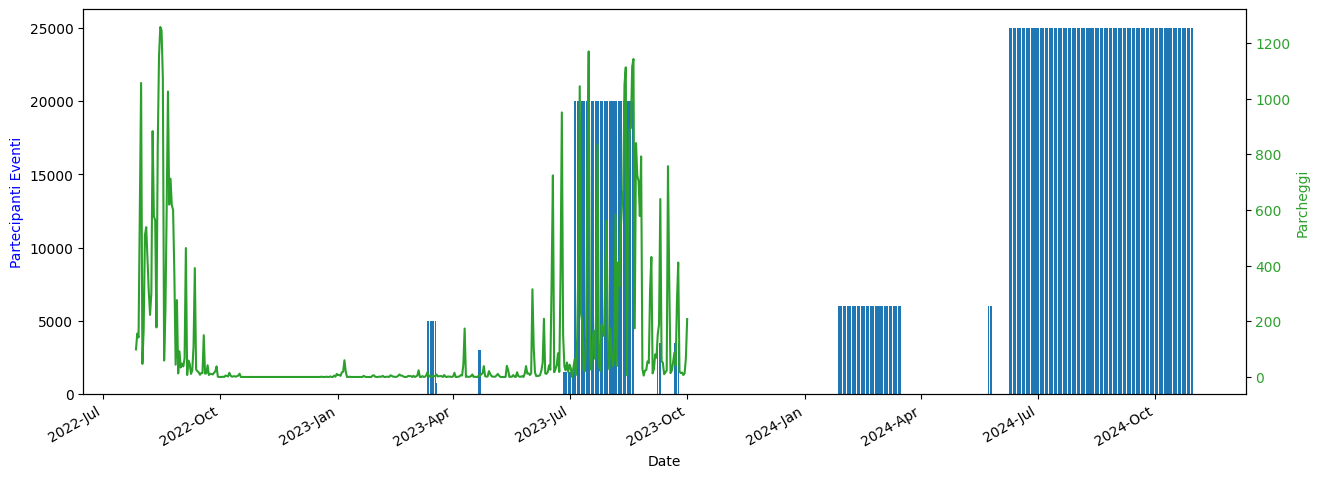

In [206]:
fig, axis = plt.subplots(figsize=(15, 5))

axis.set_xlabel('Date')
axis.set_ylabel('Partecipanti Eventi', color='blue')
#axis.set_title('Eventi', loc='left', y=0.85, x=0.02, fontsize='medium')
axis.xaxis.set_major_formatter(
    mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
axis.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in axis.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
axis.bar(eventi["date"], eventi["participants"])

ax2 = axis.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Parcheggi', color=color)  
ax2.plot(statistiche_parcheggi_molveno_df["date"], statistiche_parcheggi_molveno_df["TOTALE"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

In [209]:
events_during_july_october_2023 = eventi[(eventi["date"] > "2023-07-01") & (eventi["date"] < "2023-10-31")]
events_during_july_october_2023

,event_name,date,organizer,location,participants
17,Scuola Estiva Internazionale Royal Academy of ...,2023-07-02,Royal Academy of Dance srl,Altopiano Paganella,1500
18,Scuola Estiva Internazionale Royal Academy of ...,2023-07-03,Royal Academy of Dance srl,Altopiano Paganella,1500
19,Scuola Estiva Internazionale Royal Academy of ...,2023-07-04,Royal Academy of Dance srl,Altopiano Paganella,1500
20,Scuola Estiva Internazionale Royal Academy of ...,2023-07-05,Royal Academy of Dance srl,Altopiano Paganella,1500
21,Scuola Estiva Internazionale Royal Academy of ...,2023-07-06,Royal Academy of Dance srl,Altopiano Paganella,1500
...,...,...,...,...,...
76,Criterium Gruppo Ciclistico Zambana,2023-08-20,Gruppo Ciclistico Zambana,Paganella,20000
77,XTERRA Dolomiti di Brenta Trail,2023-09-09,Molveno Holiday Scarl,Molveno,2300
78,Orme-Festival dei sentieri sesta edizione,2023-09-08,Consorzio Fai Attività Iniziative e Vacanze In...,Fai della Paganella,3500
79,Orme-Festival dei sentieri sesta edizione,2023-09-09,Consorzio Fai Attività Iniziative e Vacanze In...,Fai della Paganella,3500
